In [1]:
import tensorflow as tf

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [7]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)  # Fix: Use x_test.shape[0]
input_shape = (28, 28, 1)


In [9]:
x_train = x_train.astype ('float32')
x_test = x_test.astype ('float32')

In [10]:
x_train /=255
x_test /=255

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
model =Sequential()
model.add(Conv2D(28,kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))

In [23]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


In [24]:
model.fit(x=x_train, y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2042 - accuracy: 0.9378
Epoch 2/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0849 - accuracy: 0.9741
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0564 - accuracy: 0.9823
Epoch 4/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0460 - accuracy: 0.9851
Epoch 5/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0363 - accuracy: 0.9880
Epoch 6/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0296 - accuracy: 0.9901
Epoch 7/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0242 - accuracy: 0.9918
Epoch 8/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0232 - accuracy: 0.9920
Epoch 9/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0204 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 31s 17m

In [25]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0561 - accuracy: 0.9859


[0.05605623871088028, 0.9858999848365784]

6


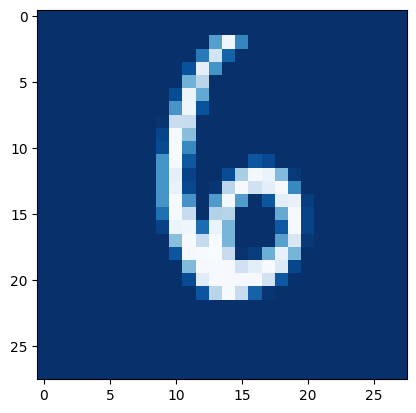

In [26]:
import matplotlib.pyplot as plt
image_index=6900
plt.imshow(x_test[image_index].reshape(28,28),cmap='Blues_r')
predict=x_test[image_index].reshape(28,28)
pred=model.predict(x_test[image_index].reshape(1,28,28,1))
print(pred.argmax())

In [32]:
y_predict=model.predict(x_test)

In [33]:
y_predict[0]

array([4.2619350e-13, 1.9596163e-11, 1.9348707e-10, 6.7106978e-09,
       5.5525320e-12, 8.3015971e-14, 1.6323779e-19, 1.0000000e+00,
       7.6843275e-11, 2.3051543e-08], dtype=float32)

In [37]:
import numpy as np
y_predicts=np.argmax(y_predict,axis=1)

In [38]:
y_predicts

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [44]:
print(y_test.shape)


(10000,)


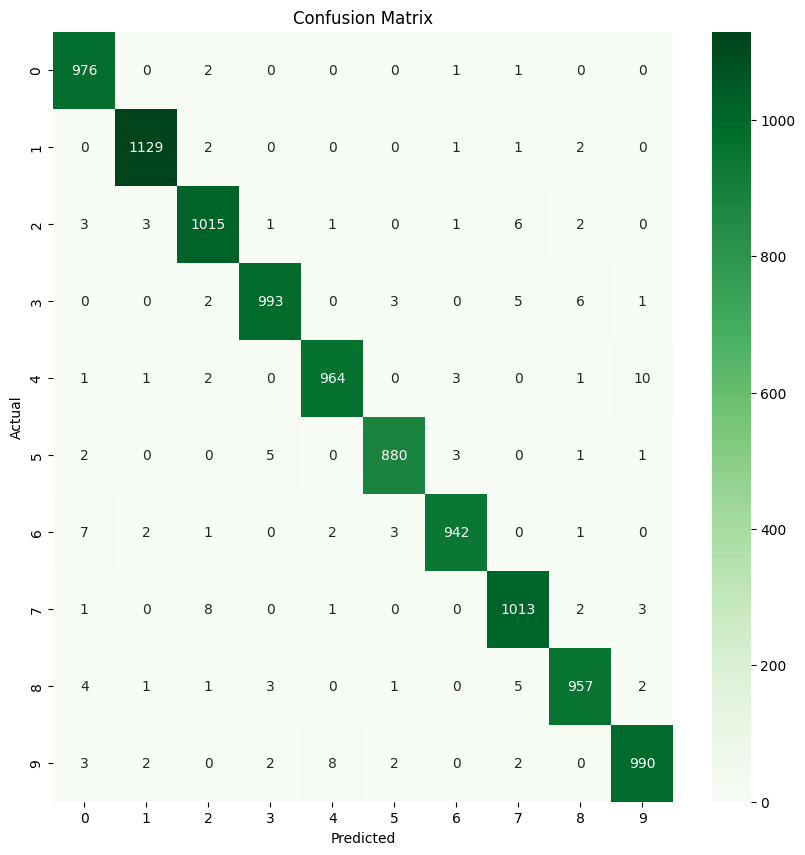

In [45]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Check if y_test is 1D or 2D
if len(y_test.shape) > 1:  
    y_test_labels = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to class labels
else:
    y_test_labels = y_test  # Already class labels, no need for argmax

y_predict_labels = np.argmax(y_predict, axis=1)  # Convert probabilities to class labels

# Compute confusion matrix
con_mat = confusion_matrix(y_test_labels, y_predict_labels)

# Plot confusion matrix
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test_labels,y_predicts))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.98      0.98       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Epoch 1/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0160 - accuracy: 0.9947 - val_loss: 0.0610 - val_accuracy: 0.9859
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0151 - accuracy: 0.9952 - val_loss: 0.0685 - val_accuracy: 0.9861
Epoch 3/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0149 - accuracy: 0.9952 - val_loss: 0.0596 - val_accuracy: 0.9863
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0130 - accuracy: 0.9951 - val_loss: 0.0607 - val_accuracy: 0.9859
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0118 - accuracy: 0.9959 - val_loss: 0.0660 - val_accuracy: 0.9860
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0124 - accuracy: 0.9958 - val_loss: 0.0616 - val_accuracy: 0.9863
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0121 - accuracy: 0.9960 - val_loss: 0.0610 -

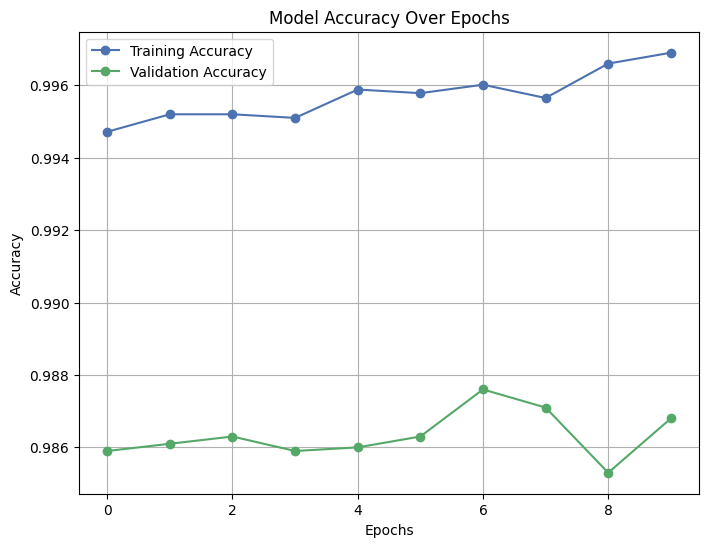

In [50]:
import matplotlib.pyplot as plt

# Train the model and store history
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)

# Extract accuracy and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot accuracy
plt.figure(figsize=(8,6))
plt.plot(train_acc, label="Training Accuracy", marker='o')
plt.plot(val_acc, label="Validation Accuracy", marker='o')

# Labels and title
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Over Epochs")
plt.legend()
plt.grid(True)
plt.show()
